## <a id = "link1"></a> Import Libraries and Load Dataset

In [24]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [25]:
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head(100)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
95,96,25742,5000,1,2,5,7
96,97,11937,18000,3,2,3,6
97,98,52736,15000,2,0,5,4
98,99,88338,13000,1,1,4,9


In [26]:
df.shape

(660, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


There are total 6 columns and 660 rows or observations in the dataset
We can see that there are no null values.

In [28]:
#checking unique values
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

we can drop sl_no as it is a unique number for each customer.

In [29]:
#Analyzing the distribution of the various attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [30]:
df.nunique() # Number of unique values in a column

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [31]:
#Customer Key seems to have duplicates lets explore
ckeys = df["Customer Key"]
ckeys[ckeys.duplicated(keep=False)]

4      47437
48     37252
104    97935
332    47437
391    96929
398    96929
411    50706
432    37252
541    50706
632    97935
Name: Customer Key, dtype: int64

In [32]:
df[df.duplicated(['Customer Key'], keep=False)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [33]:
#dropping the serial no. column as it does not hold any statistical significance
df.drop('Sl_No',axis=1,inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [35]:
#check for null values
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No null values. 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


We have 5 variables which are all of type integers

In [37]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


#EDA
Univariate Analysis

In [38]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

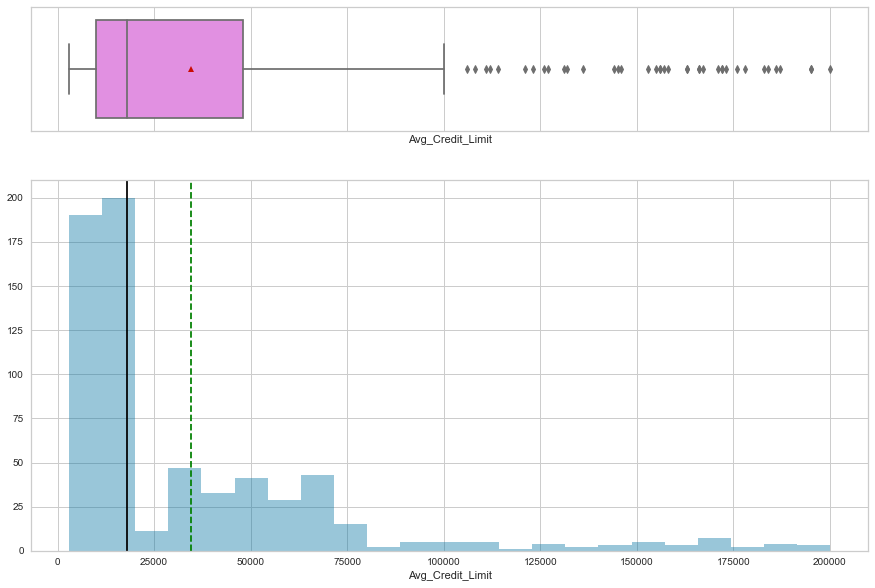

In [39]:
# Observations on Customer_age
histogram_boxplot(df["Avg_Credit_Limit"])

As per the boxplot, there are outliers in 'Avg Credit Limit' variable
More number of customers have the average credit limit between 5000 and 20000

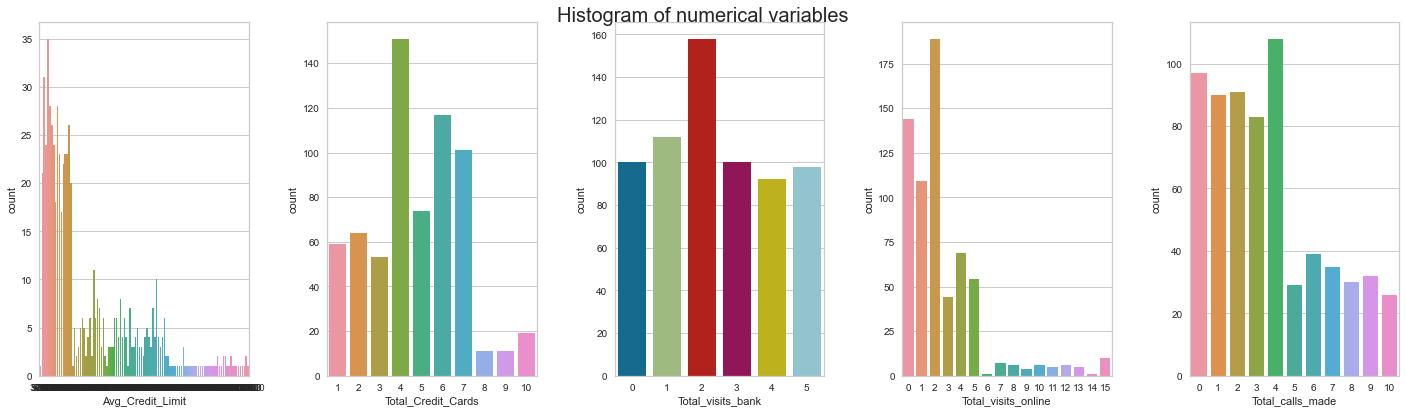

In [40]:
all_col = df.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

Observations

Most of the customers have got 4 credit cards
There are many customers who visited the bank twice
there are customers who need customer support via phone. 

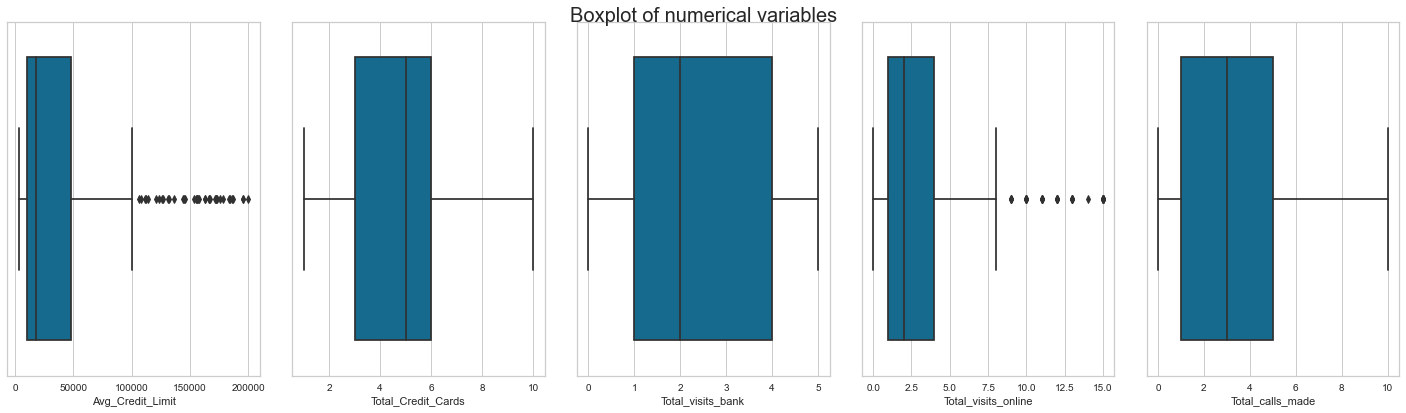

In [41]:
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

Observations

25 % of customer have average_credit_limit below 50000,
50 % of customers have 6 or less than 6 Credit cards,
75 % of customers visted bank more than 3 times,
50 % of customers called bank 5 times or less than 5 times.

#Bivariate Analsysis

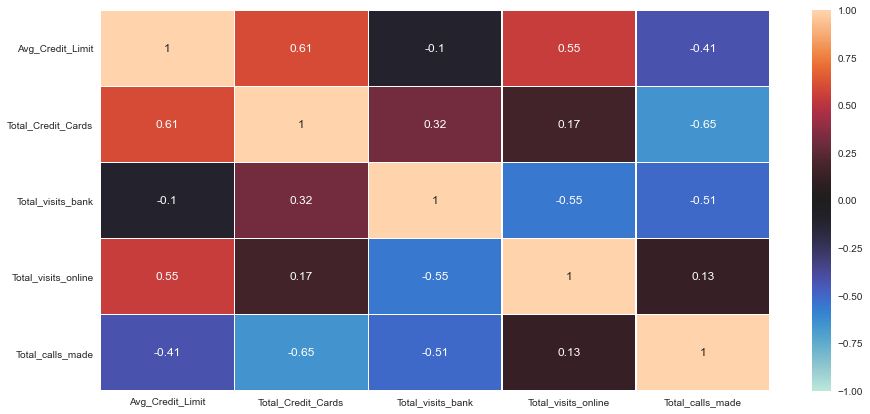

In [42]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

Observation

Customers having more number of credit cards have high average credit limit. Which also implies that they have to visit online more 
to pay their bills.


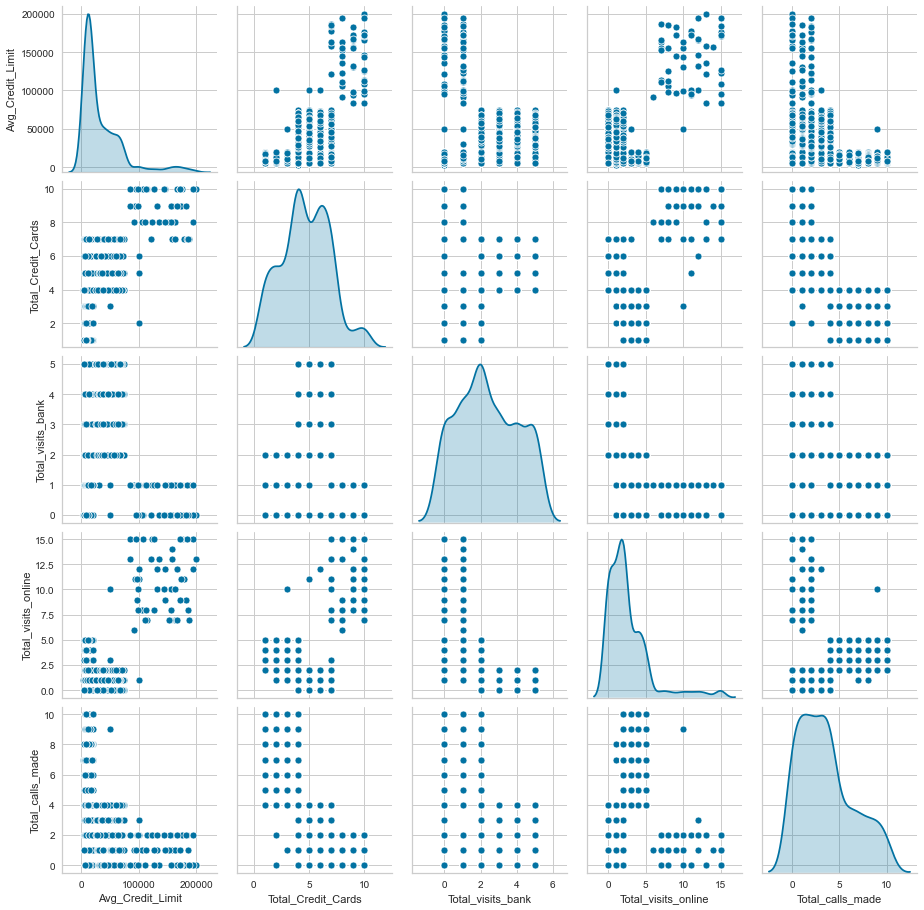

In [43]:
sns.pairplot(df[all_col],diag_kind="kde")

Observations

Average Credit Limit seems to be bimodal

In [44]:
 #Scaling the data set before clustering
df.drop('Customer Key',axis=1,inplace=True)
from scipy.stats import zscore
df = df.apply(zscore)
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)   

In [46]:
subset_scaled

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [47]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


C:\Users\jayko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.942988258853591
Number of Clusters: 7 	Average Distortion: 0.9094343235465747
Number of Clusters: 8 	Average Distortion: 0.8939689805822187


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

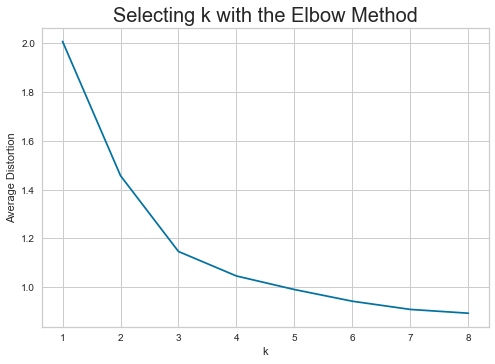

In [48]:
clusters = range(1,9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

Value of K is exactly at 3 based on the elbow plot

In [49]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663222356)
For n_clusters = 3, silhouette score is 0.5157182558881843)
For n_clusters = 4, silhouette score is 0.35566706193742664)
For n_clusters = 5, silhouette score is 0.2723982945419402)
For n_clusters = 6, silhouette score is 0.25534801594705664)
For n_clusters = 7, silhouette score is 0.24827133933666998)
For n_clusters = 8, silhouette score is 0.22832787289726883)
For n_clusters = 9, silhouette score is 0.22001857560652302)


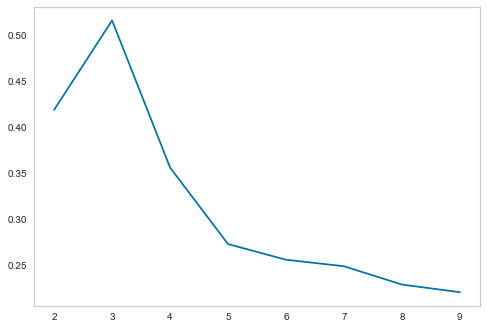

In [50]:
plt.plot(cluster_list,sil_score)
plt.grid()

From silhouette score, it seems that 3 is good value of k

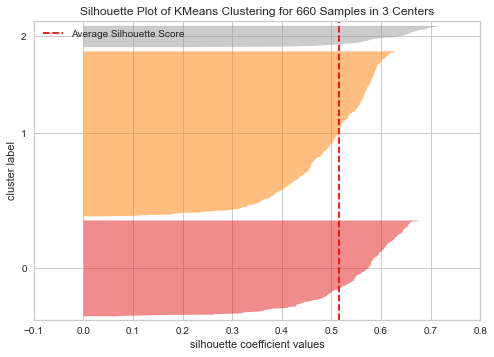

In [51]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

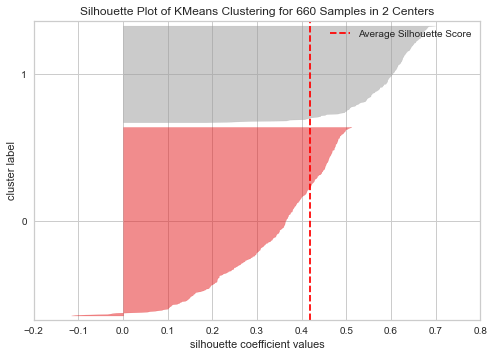

In [52]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

Considering all aspects:
    - silhouette score
    - silhouette coeff per cluster
    - distortion
    - business represention
    - number of datapoints in each cluster
3 would be optimal values for k.

Let us take 3 as appropriate no. of clusters as silhoutte score is high.

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [54]:
df['K_means_segments'] = kmeans.labels_

In [55]:
cluster_profile = df.groupby('K_means_segments').mean()

In [56]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Avg_Credit_Limit'].count().values


In [57]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,-0.021062,0.373690,0.666395,-0.553672,-0.553005,386
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109,224
2,2.831764,1.862226,-1.105763,2.827319,-0.874330,50


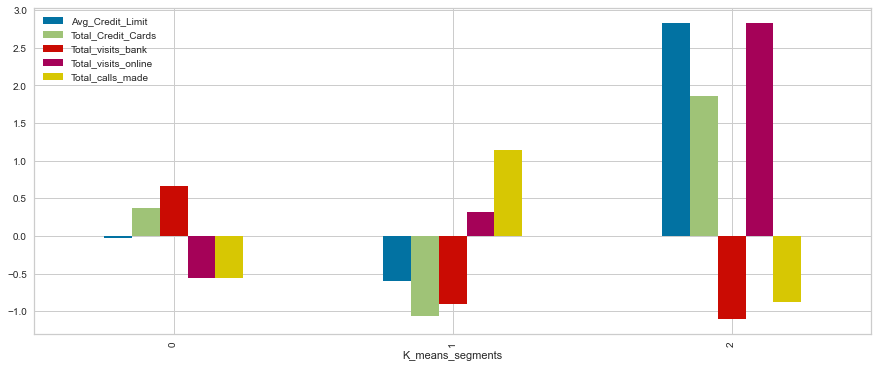

In [58]:
df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

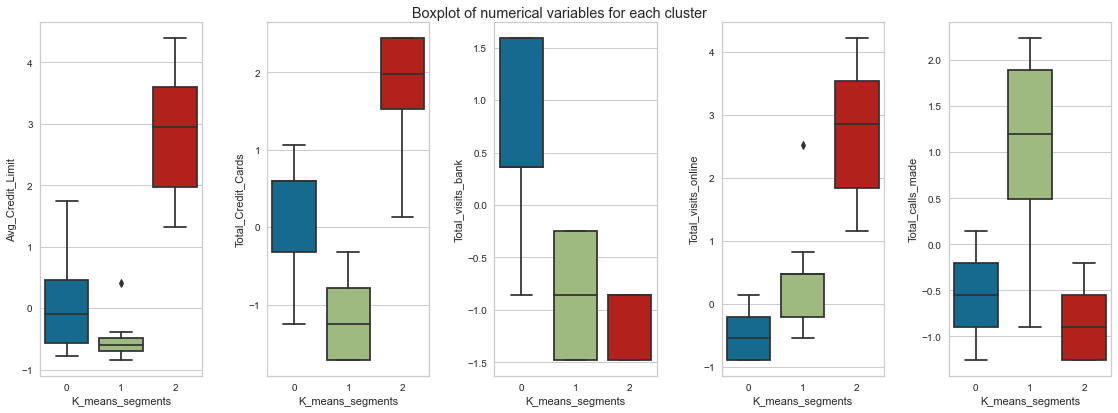

In [59]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

Insights

Clusters 0 :

Average Credit Limit is between -0.5 and 0.5
Total Credit cards are between -0.8 and 0.6
Total visits to the bank is from 0.4 to 1.7
Total visits online is -0.8 to -0.3 
Total calls made is between -0.8 and -0.2

Cluster 1 :

Average Credit Limit is below 0
Total Credit cards is below 0
Total visits to the bank is below 0
Total visits online is between -0.3 to 0.5 
Total calls made is from 0.5 to 1.8

Cluster 2 :

Average Credit Limit is very high from 2 and 3.8
Total Credit cards are between 1.6 and 2.8
Total visits to the bank is below -0.5
Total visits online is from 1.8 to 3.5
Total calls made is below -0.5

In [158]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [159]:
df_std = df.drop('K_means_segments',axis=1)

In [160]:
#df for hierarchical clustering.
# or
# method 2
# you could use any
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(df_std),columns=df_std.columns)


In [161]:
X_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


#Find out the linkage matrix
#Use ward as linkage metric and distance as Eucledian

In [139]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
Z = linkage(X_std, 'ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.7415691585186225

In [140]:
Z.shape

(659, 4)

In [141]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.85561099,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

Plot the dendrogram for the consolidated dataframe

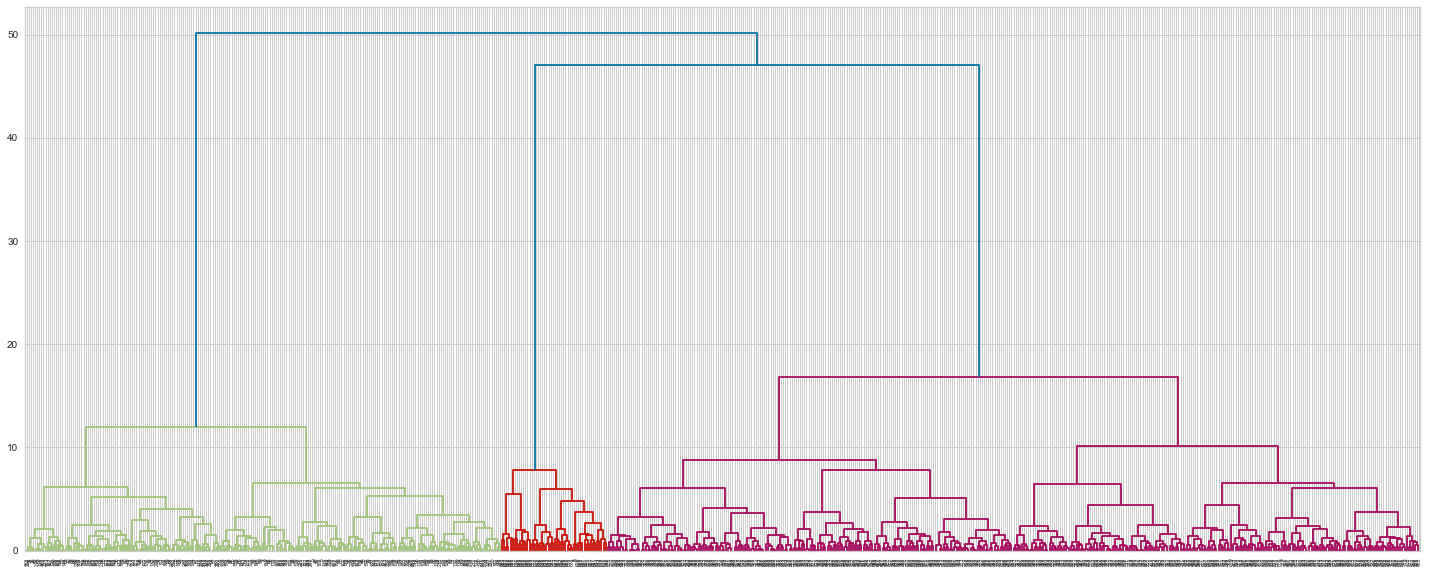

In [142]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

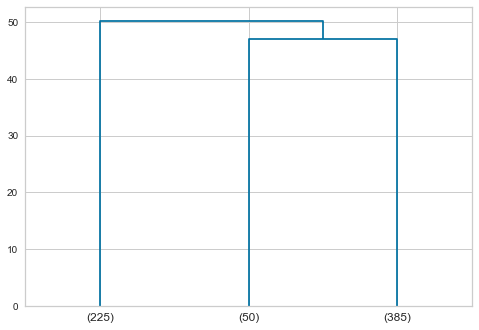

In [143]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [149]:
max_d = 47

In [150]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [151]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(X_std,clusters)

0.5147639589978604

In [167]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(X_std)
df_std['clusters'] = model.labels_
df_std.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1


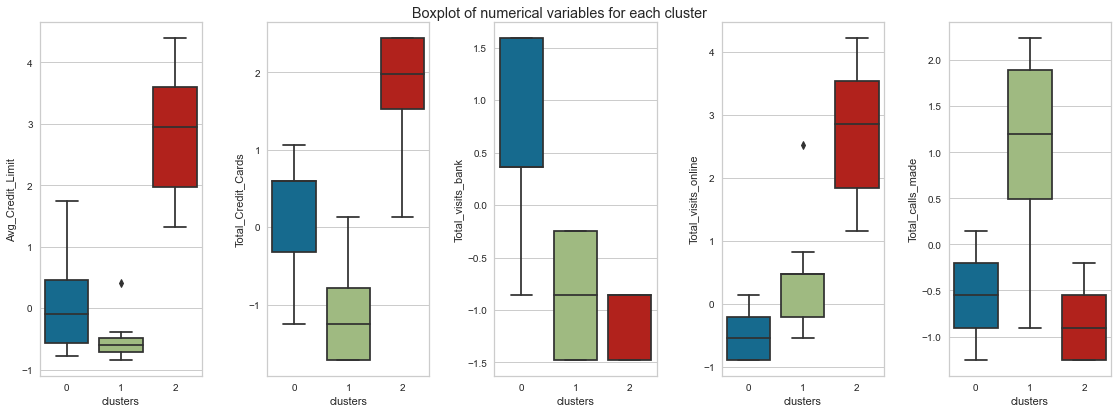

In [168]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_std[all_col[counter]],x=df_std['clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

In [ ]:
Clusters 0 :

Average Credit Limit is between -0.5 and 0.5 Total Credit cards are between -0.4 and 0.6 Total visits to the bank is from 0.4 to 1.7 Total visits online is -0.8 to -0.3 Total calls made is between -0.8 and -0.2

Cluster 1 :

Average Credit Limit is below 0 Total Credit cards is below 0 Total visits to the bank is below 0 Total visits online is between -0.3 to 0.5 Total calls made is from 0.5 to 1.8

Cluster 2 :

In [102]:
#
#Use average as linkage metric and distance as Eucledian
Z = linkage(X_std, 'average', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.935593182700049

In [103]:
Z.shape

(659, 4)

In [104]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       [ 252.        ,  324.        ,    0.        ,    2.        ],
       ...,
       [   0.        , 1309.        ,    3.11146928,  386.        ],
       [1315.        , 1316.        ,    3.62938754,  610.        ],
       [1314.        , 1317.        ,    6.10075503,  660.        ]])

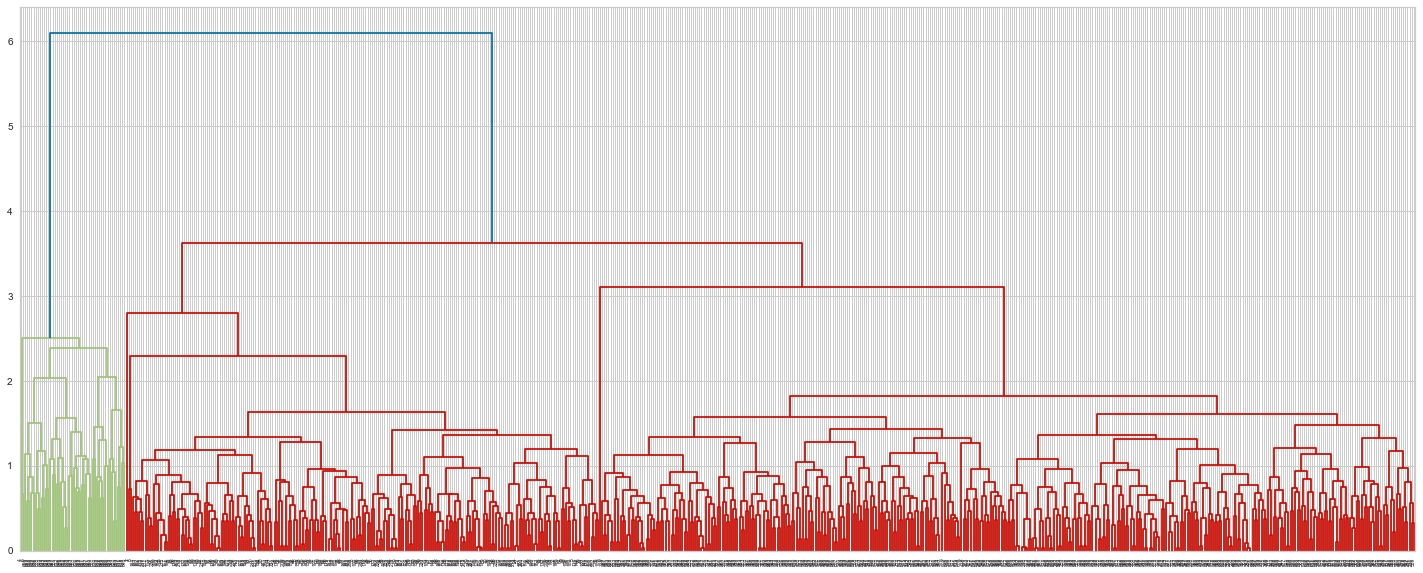

In [105]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

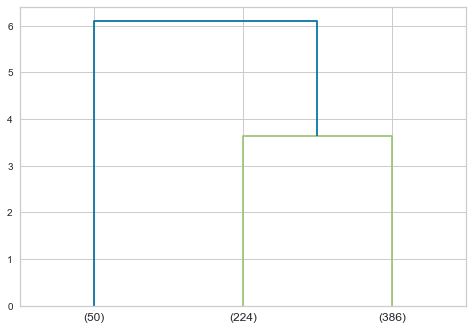

In [106]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [107]:
linkageaverage_max_d = 3.8

In [108]:
clusters = fcluster(Z, linkageaverage_max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [109]:
silhouette_score(X_std,clusters)

0.5890948086171863

In [110]:
#
#Use average as linkage metric and distance as Eucledian
Z = linkage(X_std, 'complete', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.9016600251443568

In [111]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 257.        ,  295.        ,    0.        ,    2.        ],
       [ 320.        ,  378.        ,    0.        ,    2.        ],
       ...,
       [1309.        , 1313.        ,    4.30668119,  386.        ],
       [1315.        , 1316.        ,    6.16396101,  610.        ],
       [1314.        , 1317.        ,    8.68043037,  660.        ]])

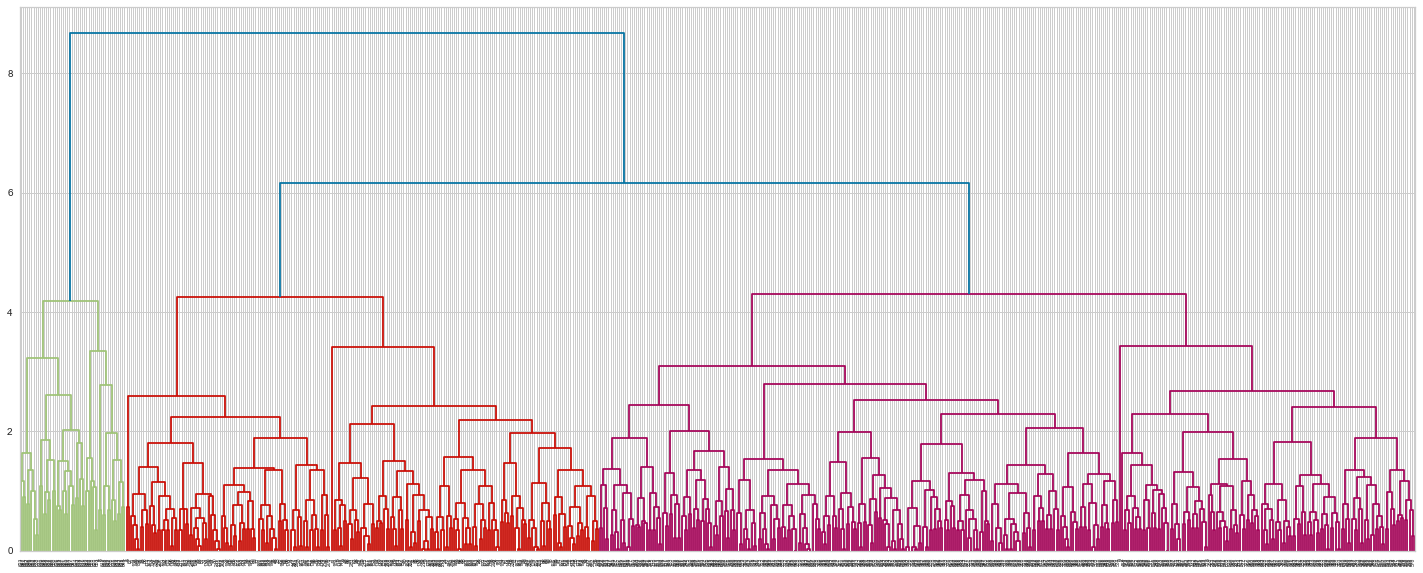

In [112]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

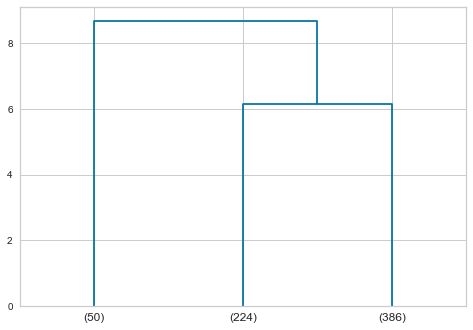

In [113]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [114]:
linkagecomplete_max_d = 6.2

In [115]:
clusters = fcluster(Z, linkagecomplete_max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [116]:
silhouette_score(X_std,clusters)

0.5890948086171863

Comparision each cluster of K-means to Hierarchical clusters.

Kmeans Clustering Silhoutte Score : 0.5157182558881843 at 3 clusters
Heirarchical Clustering:
Silhoutte Score for Ward Linkage method: 0.57 at 3 clusters
Silhoutte Score for Average Linkage method: 0.58 at 3 clusters
Silhoutte Score for Ward Linkage method: 0.58 at 3 clusters

Based on above data, Heirarchical Clustering have got a good Silhoutte Score. Silhoutte Score close to 1 means that clusters are well seperated. 

Overall K value in Kmeans clustering is 3 and gives best results. We can say at 3 value of K it is well seperated clusters for all the data points. 
In both K-means and Hierarchical clusters, the clusters look similar. 


Analysis of each clusters formed.

In Kmeans:
Clusters 0 :

Average Credit Limit is between -0.5 and 0.5 Total Credit cards are between -0.4 and 0.6 Total visits to the bank is from 0.4 to 1.7 Total visits online is -0.8 to -0.3 Total calls made is between -0.8 and -0.2

Cluster 1 :

Average Credit Limit is below 0 Total Credit cards is below 0 Total visits to the bank is below 0 Total visits online is between -0.3 to 0.5 Total calls made is from 0.5 to 1.8

Cluster 2 :

Average Credit Limit is very high from 2 and 3.8 Total Credit cards are between 1.6 and 2.8 Total visits to the bank is below -0.5 Total visits online is from 1.8 to 3.5 Total calls made is below -0.5

Heirarchical Clustering:

Clusters 0 :

Average Credit Limit is between -0.5 and 0.5 Total Credit cards are between -0.4 and 0.6 Total visits to the bank is from 0.4 to 1.7 Total visits online is -0.8 to -0.3 Total calls made is between -0.8 and -0.2

Cluster 1 :

Average Credit Limit is below 0 Total Credit cards is below 0 Total visits to the bank is below 0 Total visits online is between -0.3 to 0.5 Total calls made is from 0.5 to 1.8

Cluster 2 :

I have seen only 2 clusters for average and complete linkage methods where as ward linkage method have 3 clusters.
Average and Complete Linkage methods with 2 clusters the Silhoutte score is slightly higher than ward linkage method. 

Both the clusters are same.




In [ ]:
Key Questions:

How many different segments of customers are there?
3 different customer segements. Customers visiting online, bank and phone customers. 

How are these segments different from each other?
Customers visiting online , want to always want to resolve the issues online. It is easy for them to shop for credit cards online 
rather than going to bank. They are the ones having higher average credit limit.

Customers visting bank. The always want to resolve the banking issues going to bank. They dont prefer using the online or calling 
the customers, they might think it is easier for them to get in contact with banker physically so they get thier needs resolved
easily. There is also possibility for them they are not comfortable with online banking or phone banking. 

Customer making phone calls or phone banking. It could be the reason that their issues are mostly resolved via phone rather than
online. Online is always not the 100% customer issue resolution. Online could lack some questions that customers have. There many 
different customers with different needs. 
It could also be that they cannot reach the bank in person and they are making phone calls. And now a days the most of the bankers
keep asking customers to call customer representative or visit online. 

What are your recommendations to the bank on how to better market to and service these customers?

Bank should most concentrate on the customers who are making calls and visiting bank more frequently. 
Is very likely that if these customers answers are answered via online they can shop for more credit cards easily and request for 
increase in credit card limit easily. 
Online saves lot of time for customers as well as for bank. 
Bank should conduct a survey for the customers visiting bank by asking them questions if they have tried online or called customer 
rep. If not bank will need to know what issues they have with online and phone banking and collect that data to improve the online and 
phone banking. 

Bank should also conduct another survey with phone banking customers to find out if they have used online. 
Phone banking is sometimes lengthy process , more wait time and customer may not get his answers completely answered and may have to 
call the bank again. If bank would collect all the questions that phone banking customers have and provide FAQs link to them 
online they is high possibility that they can get all answers. 

Bank should also provide easy ways of setting up the bank accounts online for the bankers visiting bank. that way they get all the info
that they need online. 
Online chat feature is one other thing where bank can think off to reduce the bank visits and calling customers.
